### MATH2504 S2, 2022, BigHW Submission 
### Submission form IV of IV 

Student #1 name: ###Lief

Student #1 ID: ###Lief

Student #2 name: Lucy Carra Schulz

Student #2 ID: 47020674

GitHub repo: ###Lief

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q13)

## 13a:

$f_1(x)=sin(x^2)$ at $x=1/2$

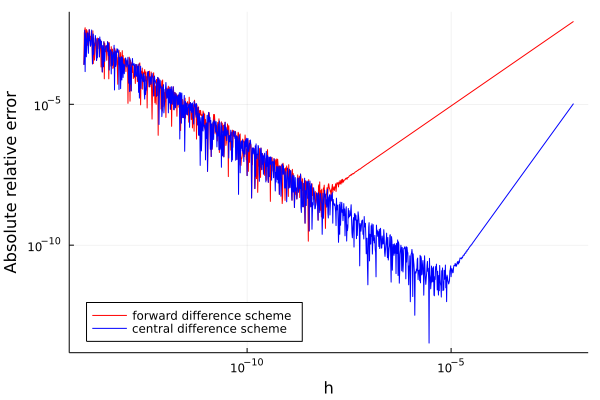

In [1]:
using Plots


diff_forward(f, x; h = sqrt(eps())) = (f(x+h) - f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x+h/2) - f(x-h/2))/h

f(x) = sin(x^2)
f_der(x) = 2x*cos(x^2) #Here we know the analytic derivative
x0= 0.5
h_range = 10 .^ (-14:0.01:-2)
errs0 = [abs(diff_forward(f, x0; h = h) - f_der(x0))/abs(f_der(x0)) for h in h_range]
errs1 = [abs(diff_central(f, x0; h = h) - f_der(x0))/abs(f_der(x0)) for h in h_range]
plot(h_range,[errs0 errs1], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["forward difference scheme" "central difference scheme"], c = [:red :blue], legend = :bottomleft)

$f_2(x)=e^x$ at $x=1$

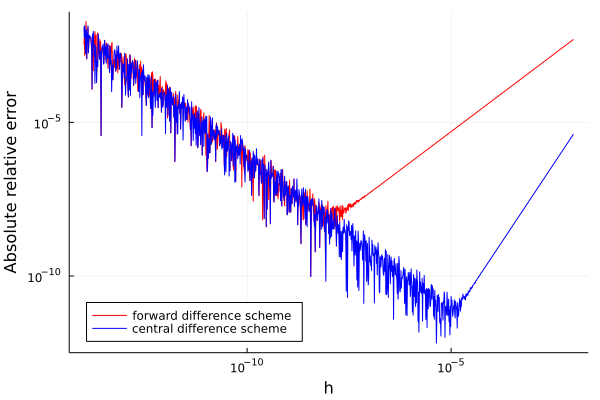

In [4]:
using Plots


diff_forward(f, x; h = sqrt(eps())) = (f(x+h) - f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x+h/2) - f(x-h/2))/h

f(x) = exp(x)
f_der(x) = exp(x) #Here we know the analytic derivative
x0= 1
h_range = 10 .^ (-14:0.01:-2)
errs0 = [abs(diff_forward(f, x0; h = h) - f_der(x0))/abs(f_der(x0)) for h in h_range]
errs1 = [abs(diff_central(f, x0; h = h) - f_der(x0))/abs(f_der(x0)) for h in h_range]
plot(h_range,[errs0 errs1], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["forward difference scheme" "central difference scheme"], c = [:red :blue], legend = :bottomleft)

$f_3(x)=atan(x)/(1+e^{-x^2})$ at $x=2$

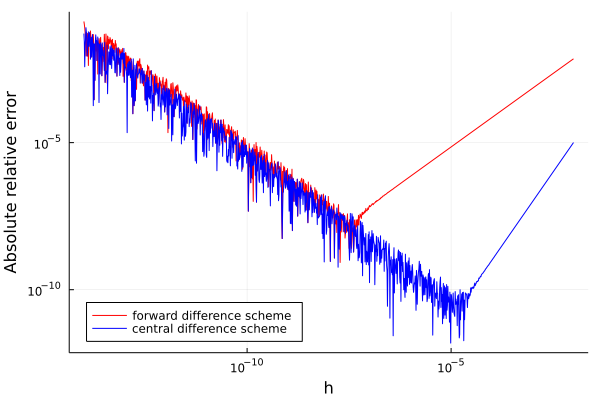

In [5]:
using Plots


diff_forward(f, x; h = sqrt(eps())) = (f(x+h) - f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x+h/2) - f(x-h/2))/h

f(x) = atan(x)/(1+exp(-x^2))
f_der(x) = (exp(x^2)*(2(x^3 + x)*atan(x) + exp(x^2) + 1))/((exp(x^2) + 1)^2 * (x^2 + 1)) #Here we know the analytic derivative
x0= 2
h_range = 10 .^ (-14:0.01:-2)
errs0 = [abs(diff_forward(f, x0; h = h) - f_der(x0))/abs(f_der(x0)) for h in h_range]
errs1 = [abs(diff_central(f, x0; h = h) - f_der(x0))/abs(f_der(x0)) for h in h_range]
plot(h_range,[errs0 errs1], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["forward difference scheme" "central difference scheme"], c = [:red :blue], legend = :bottomleft)

## 13b:

In [ ]:
###Lucy Convert to a markdown cell and answer 13b here (in place of this comment)

## 13c:

In [ ]:
###Lucy Answer 13b here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q14)

In [ ]:
###Lief Answer 14 here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q15)

## 15a:

In [ ]:
###Lief Answer 15a here (in place of this comment)

## 15b:

In [ ]:
###Lief Answer 15b here (in place of this comment)

## 15c:

In [ ]:
###Lief Answer 15c here (in place of this comment)

## 15d:

In [ ]:
###Lief Answer 15d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q16)

## 16a:

In [ ]:
###Lief Answer 16a here (in place of this comment)

## 16b:

In [ ]:
###Lief Answer 16b here (in place of this comment)

## 16c:

In [ ]:
###Lief Answer 16c here (in place of this comment)

## 16d:

In [ ]:
###Lief Answer 16d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q17)

As a BMath student hoping to major in data analytics and minor in computer science, I found Dr. Amy Chan’s perspective seminar to be really insightful. Her seminar reinforced that I chose the right degree and major, because hearing her experience made me excited to enter the outside world of programmers and statisticians. 

Dr Chan studied her undergraduate degree and honours in real analysis and applied maths (topology optimisation) from a theoretical side of maths, however also moved into image analysis of fields of crops and brain MRIs with the CSIRO which was more applied maths and programming. She then completed her PhD with CSIRO in image analysis and statistics despite not doing statistics in her undergraduate degree. She concluded that research was not for her and funnily she does not recommend completing a PhD. 

After leaving CSIRO, Dr Chan joined Polymathian which does operations research, discrete event simulation and data analytics for many different companies in many different fields. At Polymathian, Dr Chan has worked for a range of sectors as a manager, software developer, consultant and statistician. 

Throughout her perspective seminar, Dr Chan emphasised that many of the skills and knowledge she has comes not just from her studies but also from learning on the job. I found this reassuring that I did not have to know everything in order to have a future in the programming/data analytics field. A few tools Dr Chan did recommend learning include programming languages such as python and C++, as well as excel. 
